<a href="https://colab.research.google.com/github/davidofitaly/04_polynomial_regression_projects/blob/main/01_poly_regression_with_synthetic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import of libraries

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

np.set_printoptions(precision=4, suppress=True)

# Set the font scale for Seaborn plots
sns.set(font_scale=1.3)

# Print the version of the imported libraries for refernece
print(f'Pandas: {pd.__version__}')
print(f'Numpy: {np.__version__}')
print(f'Sklearn: {sklearn.__version__}')
print(f'Seaborn: {sns.__version__}')

Pandas: 2.1.4
Numpy: 1.26.4
Sklearn: 1.5.2
Seaborn: 0.13.1


###Data generation

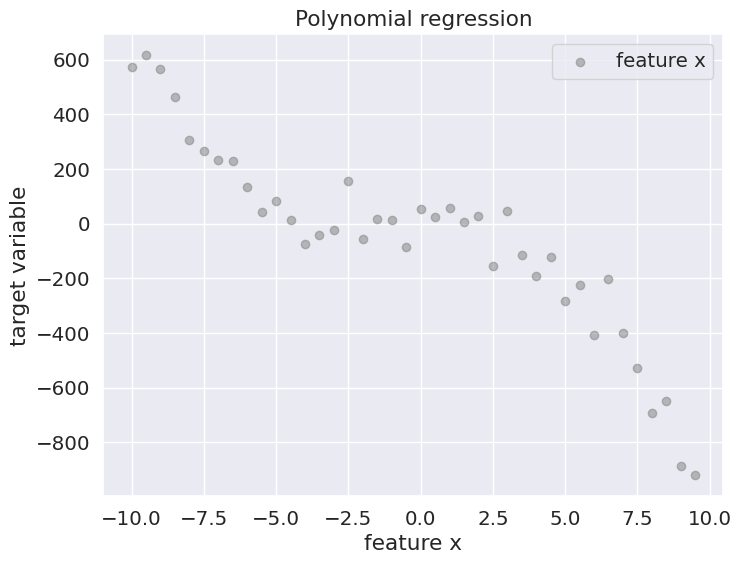

In [2]:
X = np.arange(-10, 10, 0.5)
noise = 80 * np.random.randn(len(X))
y = -X**3 - 2*X**2 + 3*X -2 + noise
X = X.reshape(40, 1)

plt.figure(figsize=(8,6))
plt.title('Polynomial regression')
plt.xlabel('feature x')
plt.ylabel('target variable')
plt.scatter(X, y, label='feature x', color='grey', alpha=0.5)
plt.legend()
plt.show()

###Linear model of the first degree

In [3]:
# Import train_test_split function from sklearn
from sklearn.model_selection import train_test_split

# Split datasets into training and testing sets with 30% of the data allocated for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing collections
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (32, 1)
X_test shape: (8, 1)
y_train shape: (32,)
y_test shape: (8,)


In [4]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_lin_1 = regressor.predict(X_test)

In [5]:
intercept_1 = regressor.intercept_

intercept_1

-65.00609190998493

In [6]:
coef_1 = regressor.coef_[0]

coef_1

-56.11320054252728

####Linear model of the first degree - visualization

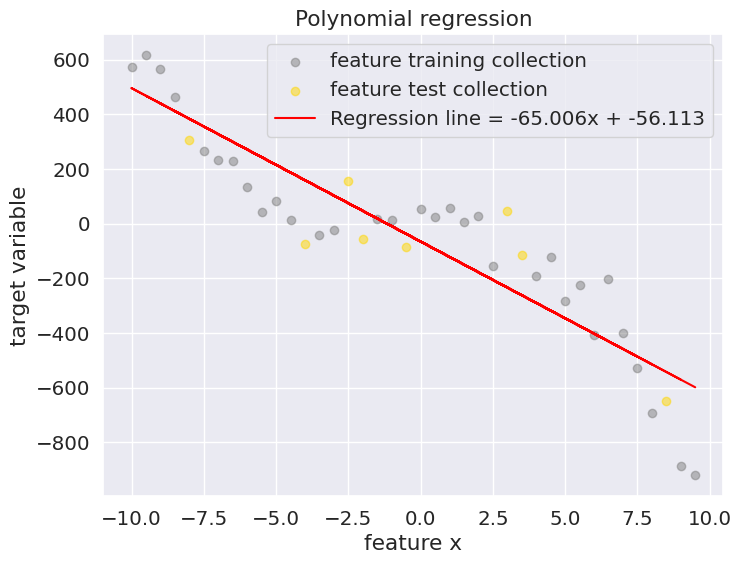

In [7]:
plt.figure(figsize=(8,6))
plt.title('Polynomial regression')
plt.xlabel('feature x')
plt.ylabel('target variable')
plt.scatter(X_train, y_train, label='feature training collection', color='grey', alpha=0.5)
plt.scatter(X_test, y_test, label='feature test collection', color='gold', alpha=0.5)
plt.plot(X_train, intercept_1 + coef_1 * X_train, color='red', label='Regression line = '  f"{intercept_1:.3f}x + {coef_1:.3f}")
plt.legend()
plt.show()

####Model-based prediction

In [8]:
# Generate predictions for the test set using the trained linear regression model
y_pred_1 = regressor.predict(X_test)

# Create a DataFrame to compare the true values (y_yest) with the predicted values (y_pred_1)
predictions_1 = pd.DataFrame(data= {'y_true': y_test, 'y_pred': y_pred_1})
predictions_1.head()

,y_true,y_pred
0,-83.381100,-36.949492
1,-55.012182,47.220309
2,156.981179,75.276909
3,45.078813,-233.345694
4,307.083130,383.899512


In [9]:
# Calculate the prediction error as the difference between the true and predicted values
predictions_1['error'] = predictions_1['y_true'] - predictions_1['y_pred']
predictions_1.head()

,y_true,y_pred,error
0,-83.381100,-36.949492,-46.431608
1,-55.012182,47.220309,-102.232491
2,156.981179,75.276909,81.704270
3,45.078813,-233.345694,278.424506
4,307.083130,383.899512,-76.816382


In [10]:
# Calculate the squared error by squaring the prediction errors
predictions_1['error_squared'] = predictions_1['error'] **2
predictions_1.head()

,y_true,y_pred,error,error_squared
0,-83.381100,-36.949492,-46.431608,2155.894266
1,-55.012182,47.220309,-102.232491,10451.482187
2,156.981179,75.276909,81.704270,6675.587667
3,45.078813,-233.345694,278.424506,77520.205707
4,307.083130,383.899512,-76.816382,5900.756595


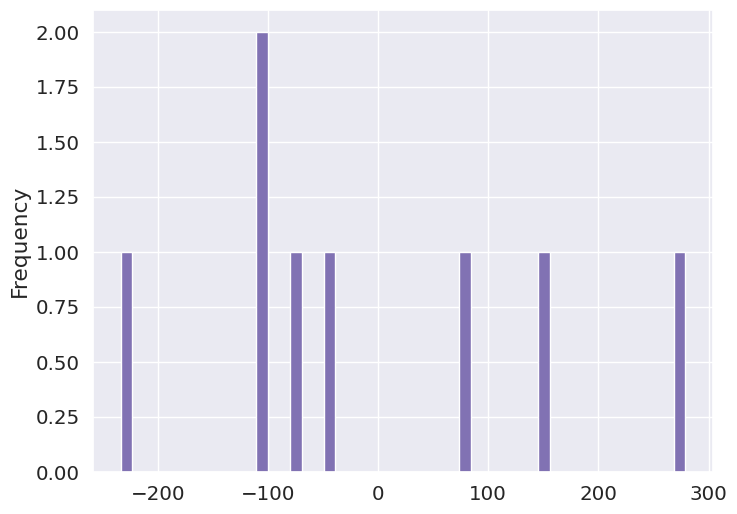

In [11]:
# Plot a histogram of the prediction errors to visualize their distribution
_ = predictions_1['error'].plot(kind='hist', bins=50, figsize=(8,6), color='m')

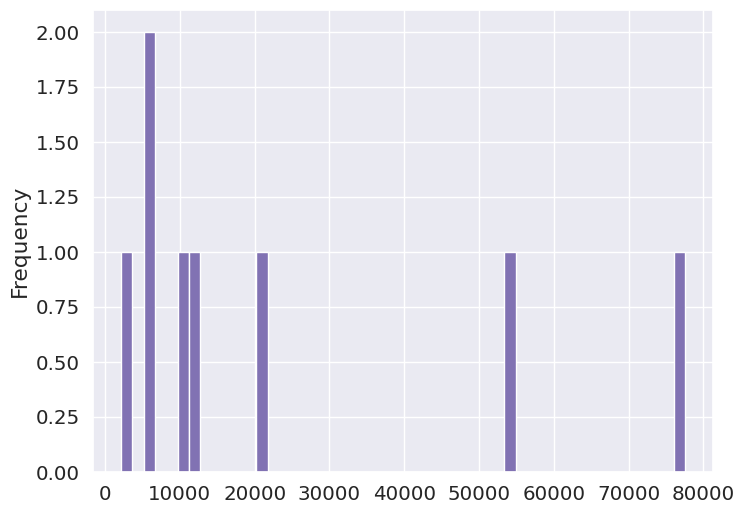

In [12]:
# Plot a histogram of the squared predictions errors to analyze their distribution
_ = predictions_1['error_squared'].plot(kind='hist', bins=50, figsize=(8,6), color='m')

####Linear model of the first degree  metrics

- Mean Absolute Error

In [13]:
# Calculate and return Mean Absolute Error (MAE) between the true and predicted values
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred_1)
print(f"The model makes an average error of {mean_absolute_error(y_test, y_pred_1):.3f}")

The model makes an average error of 133.876


- Mean Squared Error

In [14]:
# Calculate and return Mean Squared Error (MSE) between the true and predicted values
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred_1)
print(f'The mean squared error of the model is: {mean_squared_error(y_test, y_pred_1):.3f}')

The mean squared error of the model is: 23710.227


- Root Mean Squared Error - RMSE

In [15]:
# Calculate the Root Mean Squared Error (RMSE) by takig the square root of the Mean Swuared Error (MSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_1))
print(f'The Root Mean Squared Error (RMSE) of the model is: {rmse:.3f}')

The Root Mean Squared Error (RMSE) of the model is: 153.981


- Max Error

In [16]:
# Calculate the maximum error between the actual and predicted values
from sklearn.metrics import max_error

max_err= max_error(y_test, y_pred_1)
print(f'The maximum error of the model is: {max_err:.3f}')

The maximum error of the model is: 278.425


- R2 score - coefficient of determination

In [17]:
# Calculate the R^2 (coefficient of determination) score for the model predictions
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_1)
print(f'The R^2 score of the model is: {r2:.3f}')

The R^2 score of the model is: 0.650


###Linear model of the second degree

In [18]:
# Import train_test_split function from sklearn
from sklearn.model_selection import train_test_split

# Split datasets into training and testing sets with 30% of the data allocated for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing collections
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (32, 1)
X_test shape: (8, 1)
y_train shape: (32,)
y_test shape: (8,)


In [19]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)


X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)


In [20]:
X_train_poly[:10]

array([[ 1.  ,  9.5 , 90.25],
       [ 1.  , -7.  , 49.  ],
       [ 1.  ,  2.5 ,  6.25],
       [ 1.  , -5.5 , 30.25],
       [ 1.  , -3.5 , 12.25],
       [ 1.  ,  5.5 , 30.25],
       [ 1.  ,  7.  , 49.  ],
       [ 1.  , -6.  , 36.  ],
       [ 1.  , -1.5 ,  2.25],
       [ 1.  ,  2.  ,  4.  ]])

In [21]:
X_test_poly[:10]

array([[ 1.  , -0.5 ,  0.25],
       [ 1.  , -2.  ,  4.  ],
       [ 1.  , -2.5 ,  6.25],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  , -8.  , 64.  ],
       [ 1.  , -4.  , 16.  ],
       [ 1.  ,  8.5 , 72.25],
       [ 1.  ,  3.5 , 12.25]])

In [22]:
regressor_2 = LinearRegression()
regressor_2.fit(X_train_poly, y_train)

LinearRegression()

In [23]:
intercept_2 = regressor_2.intercept_

intercept_2

-13.910537068425796

In [24]:
coef_2 = regressor_2.coef_

coef_2

array([  0.    , -57.1027,  -1.4274])

####Linear model of the second degree - visualization

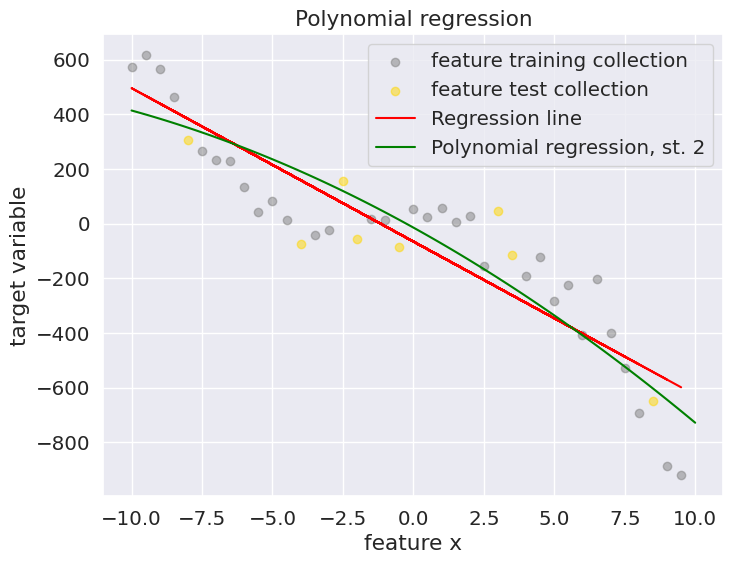

In [25]:
X_range_2 = np.linspace(-10, 10, 100).reshape(-1, 1)
X_range_poly_2 = poly.transform(X_range_2)
y_range_pred_2 = regressor_2.predict(X_range_poly_2)


y_pred_2 = regressor_2.predict(X_test_poly)
plt.figure(figsize=(8,6))
plt.title('Polynomial regression')
plt.xlabel('feature x')
plt.ylabel('target variable')
plt.scatter(X_train, y_train, label='feature training collection', color='grey', alpha=0.5)
plt.scatter(X_test, y_test, label='feature test collection', color='gold', alpha=0.5)
plt.plot(X_train, intercept_1 + coef_1 * X_train, color='red', label="Regression line")
plt.plot(X_range_2, y_range_pred_2, color='green', label='Polynomial regression, st. 2')
plt.legend()
plt.show()

####Model-based prediction

In [26]:
# Generate predictions for the test set using the trained linear regression model
y_pred_2 = regressor_2.predict(X_test_poly)

# Create a DataFrame to compare the true values (y_yest) with the predicted values (y_pred_1)
predictions_2 = pd.DataFrame(data= {'y_true': y_test, 'y_pred': y_pred_2})
predictions_2.head()

,y_true,y_pred
0,-83.381100,14.283961
1,-55.012182,94.585161
2,156.981179,119.924796
3,45.078813,-198.065560
4,307.083130,351.555537


In [27]:
# Calculate the prediction error as the difference between the true and predicted values
predictions_2['error'] = predictions_2['y_true'] - predictions_2['y_pred']
predictions_2.head()

,y_true,y_pred,error
0,-83.381100,14.283961,-97.665061
1,-55.012182,94.585161,-149.597343
2,156.981179,119.924796,37.056383
3,45.078813,-198.065560,243.144373
4,307.083130,351.555537,-44.472407


In [28]:
# Calculate the squared error by squaring the prediction errors
predictions_2['error_squared'] = predictions_2['error'] **2
predictions_2.head()


,y_true,y_pred,error,error_squared
0,-83.381100,14.283961,-97.665061,9538.464222
1,-55.012182,94.585161,-149.597343,22379.365059
2,156.981179,119.924796,37.056383,1373.175491
3,45.078813,-198.065560,243.144373,59119.185914
4,307.083130,351.555537,-44.472407,1977.794949


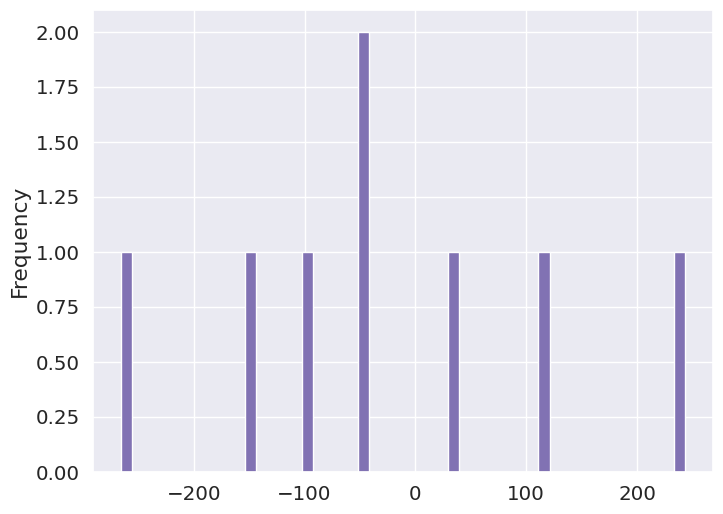

In [29]:
# Plot a histogram of the prediction errors to visualize their distribution
_ = predictions_2['error'].plot(kind='hist', bins=50, figsize=(8,6), color='m')

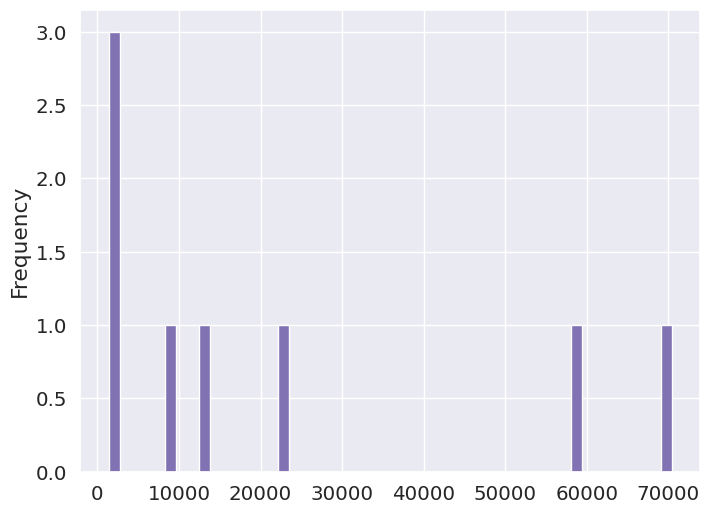

In [30]:
# Plot a histogram of the squared predictions errors to analyze their distribution
_ = predictions_2['error_squared'].plot(kind='hist', bins=50, figsize=(8,6), color='m')

####Linear model of the first degree metric

- Mean Absolute Error

In [31]:
# Calculate and return Mean Absolute Error (MAE) between the true and predicted values
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred_2)
print(f"The model makes an average error of {mean_absolute_error(y_test, y_pred_2):.3f}")

The model makes an average error of 124.869


- Mean Squared Error

In [32]:
# Calculate and return Mean Squared Error (MSE) between the true and predicted values
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred_2)
print(f'The mean squared error of the model is: {mean_squared_error(y_test, y_pred_2):.3f}')

The mean squared error of the model is: 22543.882


- Root Mean Squared Error - RMSE

In [33]:
# Calculate the Root Mean Squared Error (RMSE) by takig the square root of the Mean Swuared Error (MSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_2))
print(f'The Root Mean Squared Error (RMSE) of the model is: {rmse:.3f}')

The Root Mean Squared Error (RMSE) of the model is: 150.146


- Max Error

In [34]:
# Calculate the maximum error between the actual and predicted values
from sklearn.metrics import max_error

max_err= max_error(y_test, y_pred_1)
print(f'The maximum error of the model is: {max_err:.3f}')

The maximum error of the model is: 278.425


- R2 score - coefficient of determination

In [35]:
# Calculate the R^2 (coefficient of determination) score for the model predictions
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_2)
print(f'The R^2 score of the model is: {r2:.3f}')

The R^2 score of the model is: 0.668


###Linear model of the third degree

In [36]:
# Import train_test_split function from sklearn
from sklearn.model_selection import train_test_split

# Split datasets into training and testing sets with 30% of the data allocated for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing collections
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (32, 1)
X_test shape: (8, 1)
y_train shape: (32,)
y_test shape: (8,)


In [37]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)


X_train_poly_3 = poly.fit_transform(X_train)
X_test_poly_3 = poly.fit_transform(X_test)


In [38]:
X_train_poly_3[:10]

array([[   1.   ,    9.5  ,   90.25 ,  857.375],
       [   1.   ,   -7.   ,   49.   , -343.   ],
       [   1.   ,    2.5  ,    6.25 ,   15.625],
       [   1.   ,   -5.5  ,   30.25 , -166.375],
       [   1.   ,   -3.5  ,   12.25 ,  -42.875],
       [   1.   ,    5.5  ,   30.25 ,  166.375],
       [   1.   ,    7.   ,   49.   ,  343.   ],
       [   1.   ,   -6.   ,   36.   , -216.   ],
       [   1.   ,   -1.5  ,    2.25 ,   -3.375],
       [   1.   ,    2.   ,    4.   ,    8.   ]])

In [39]:
X_test_poly_3[:10]

array([[   1.   ,   -0.5  ,    0.25 ,   -0.125],
       [   1.   ,   -2.   ,    4.   ,   -8.   ],
       [   1.   ,   -2.5  ,    6.25 ,  -15.625],
       [   1.   ,    3.   ,    9.   ,   27.   ],
       [   1.   ,   -8.   ,   64.   , -512.   ],
       [   1.   ,   -4.   ,   16.   ,  -64.   ],
       [   1.   ,    8.5  ,   72.25 ,  614.125],
       [   1.   ,    3.5  ,   12.25 ,   42.875]])

In [40]:
regressor_3 = LinearRegression()
regressor_3.fit(X_train_poly_3, y_train)

LinearRegression()

In [41]:
intercept_3 = regressor_3.intercept_

intercept_3

-4.839905633528097

In [42]:
coef_3 = regressor_3.coef_

coef_3


array([ 0.    , -6.9594, -2.1115, -0.8284])

####Linear model of the third degree - visualization

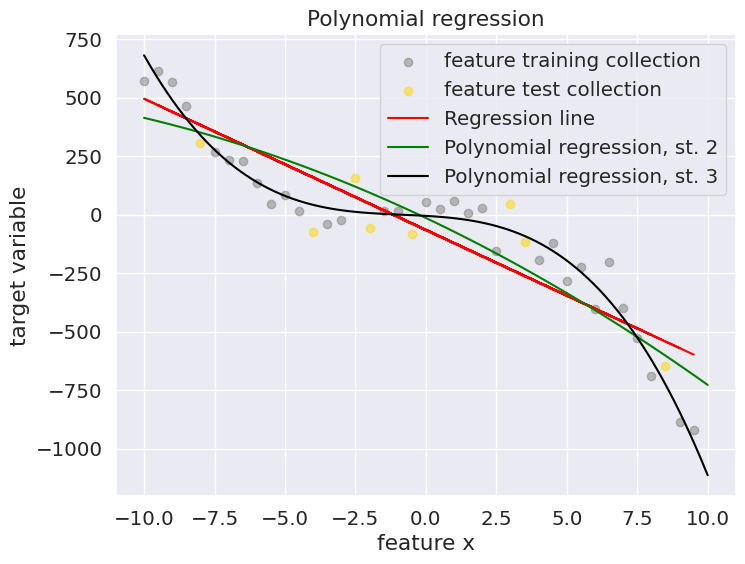

In [47]:
X_range_3 = np.linspace(-10, 10, 100).reshape(-1, 1)
X_range_poly_3 = poly.transform(X_range_3)
y_range_pred_3 = regressor_3.predict(X_range_poly_3)


plt.figure(figsize=(8,6))
plt.title('Polynomial regression')
plt.xlabel('feature x')
plt.ylabel('target variable')
plt.scatter(X_train, y_train, label='feature training collection', color='grey', alpha=0.5)
plt.scatter(X_test, y_test, label='feature test collection', color='gold', alpha=0.5)
plt.plot(X_train, intercept_1 + coef_1 * X_train, color='red', label="Regression line")
plt.plot(X_range_2, y_range_pred_2, color='green', label='Polynomial regression, st. 2')
plt.plot(X_range_3, y_range_pred_3, color='black', label='Polynomial regression, st. 3')
plt.legend()
plt.show()

####Model-based prediction

In [49]:
# Generate predictions for the test set using the trained linear regression model
y_pred_3 = regressor_3.predict(X_test_poly_3)

# Create a DataFrame to compare the true values (y_yest) with the predicted values (y_pred_1)
predictions_3 = pd.DataFrame(data= {'y_true': y_test, 'y_pred': y_pred_3})
predictions_3.head()


,y_true,y_pred
0,-83.381100,-1.784536
1,-55.012182,7.260393
2,156.981179,12.306069
3,45.078813,-67.089198
4,307.083130,339.859776


In [50]:
# Calculate the prediction error as the difference between the true and predicted values
predictions_3['error'] = predictions_3['y_true'] - predictions_3['y_pred']
predictions_3.head()

,y_true,y_pred,error
0,-83.381100,-1.784536,-81.596564
1,-55.012182,7.260393,-62.272574
2,156.981179,12.306069,144.675110
3,45.078813,-67.089198,112.168011
4,307.083130,339.859776,-32.776646


In [51]:
# Calculate the squared error by squaring the prediction errors
predictions_3['error_squared'] = predictions_3['error'] **2
predictions_3.head()

,y_true,y_pred,error,error_squared
0,-83.381100,-1.784536,-81.596564,6657.999239
1,-55.012182,7.260393,-62.272574,3877.873510
2,156.981179,12.306069,144.675110,20930.887596
3,45.078813,-67.089198,112.168011,12581.662665
4,307.083130,339.859776,-32.776646,1074.308515


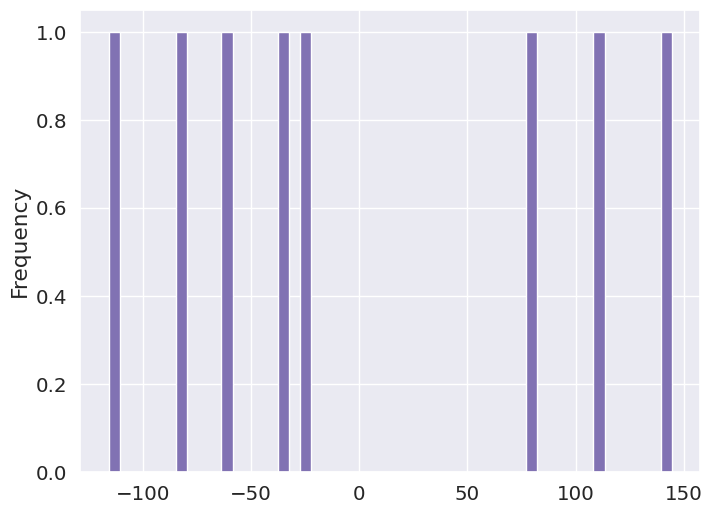

In [52]:
# Plot a histogram of the prediction errors to visualize their distribution
_ = predictions_3['error'].plot(kind='hist', bins=50, figsize=(8,6), color='m')

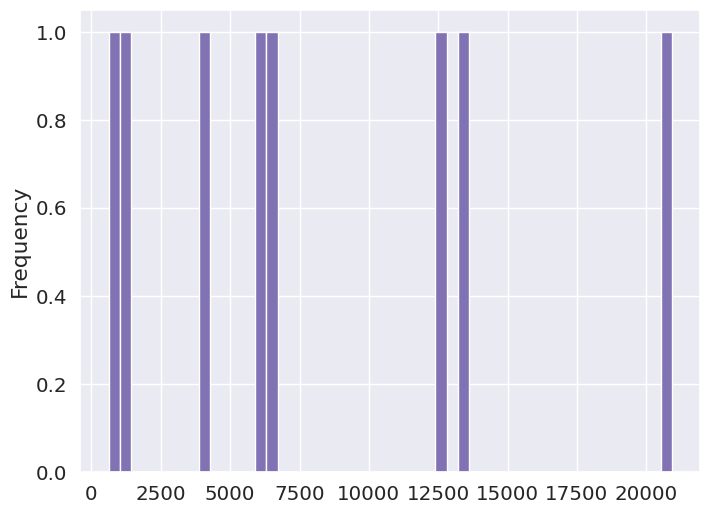

In [53]:
# Plot a histogram of the squared predictions errors to analyze their distribution
_ = predictions_3['error_squared'].plot(kind='hist', bins=50, figsize=(8,6), color='m')

####Linear model of the third degree metric

- Mean Absolute Error

In [54]:
# Calculate and return Mean Absolute Error (MAE) between the true and predicted values
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred_3)
print(f"The model makes an average error of {mean_absolute_error(y_test, y_pred_3):.3f}")

The model makes an average error of 81.435


- Mean Squared Error

In [62]:
# Calculate and return Mean Squared Error (MSE) between the true and predicted values
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred_3)
print(f'The mean squared error of the model is: {mean_squared_error(y_test, y_pred_2):.3f}')

The mean squared error of the model is: 22543.882


- Root Mean Squared Error - RMSE

In [61]:
# Calculate the Root Mean Squared Error (RMSE) by takig the square root of the Mean Swuared Error (MSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_3))
print(f'The Root Mean Squared Error (RMSE) of the model is: {rmse:.3f}')

The Root Mean Squared Error (RMSE) of the model is: 90.241


- Max Error

In [60]:
# Calculate the maximum error between the actual and predicted values
from sklearn.metrics import max_error

max_err= max_error(y_test, y_pred_3)
print(f'The maximum error of the model is: {max_err:.3f}')

The maximum error of the model is: 144.675


- R2 score - coefficient of determination

In [59]:
# Calculate the R^2 (coefficient of determination) score for the model predictions
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_3)
print(f'The R^2 score of the model is: {r2:.3f}')

The R^2 score of the model is: 0.880


###Linear model of the four degree

In [63]:

# Import train_test_split function from sklearn
from sklearn.model_selection import train_test_split

# Split datasets into training and testing sets with 30% of the data allocated for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing collections
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (32, 1)
X_test shape: (8, 1)
y_train shape: (32,)
y_test shape: (8,)


In [64]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4)


X_train_poly_4 = poly.fit_transform(X_train)
X_test_poly_4 = poly.fit_transform(X_test)

In [65]:
X_train_poly_4[:10]

array([[   1.    ,    9.5   ,   90.25  ,  857.375 , 8145.0625],
       [   1.    ,   -7.    ,   49.    , -343.    , 2401.    ],
       [   1.    ,    2.5   ,    6.25  ,   15.625 ,   39.0625],
       [   1.    ,   -5.5   ,   30.25  , -166.375 ,  915.0625],
       [   1.    ,   -3.5   ,   12.25  ,  -42.875 ,  150.0625],
       [   1.    ,    5.5   ,   30.25  ,  166.375 ,  915.0625],
       [   1.    ,    7.    ,   49.    ,  343.    , 2401.    ],
       [   1.    ,   -6.    ,   36.    , -216.    , 1296.    ],
       [   1.    ,   -1.5   ,    2.25  ,   -3.375 ,    5.0625],
       [   1.    ,    2.    ,    4.    ,    8.    ,   16.    ]])

In [66]:
X_test_poly_4[:10]

array([[   1.    ,   -0.5   ,    0.25  ,   -0.125 ,    0.0625],
       [   1.    ,   -2.    ,    4.    ,   -8.    ,   16.    ],
       [   1.    ,   -2.5   ,    6.25  ,  -15.625 ,   39.0625],
       [   1.    ,    3.    ,    9.    ,   27.    ,   81.    ],
       [   1.    ,   -8.    ,   64.    , -512.    , 4096.    ],
       [   1.    ,   -4.    ,   16.    ,  -64.    ,  256.    ],
       [   1.    ,    8.5   ,   72.25  ,  614.125 , 5220.0625],
       [   1.    ,    3.5   ,   12.25  ,   42.875 ,  150.0625]])

In [67]:
regressor_4 = LinearRegression()
regressor_4.fit(X_train_poly_4, y_train)

LinearRegression()

In [68]:
intercept_4 = regressor_4.intercept_

intercept_4

-2.806330972356662

In [69]:
coef_4 = regressor_4.coef_

coef_4


array([ 0.    , -7.0676, -2.2954, -0.8259,  0.0021])

####Linear model of the four degree - visualization

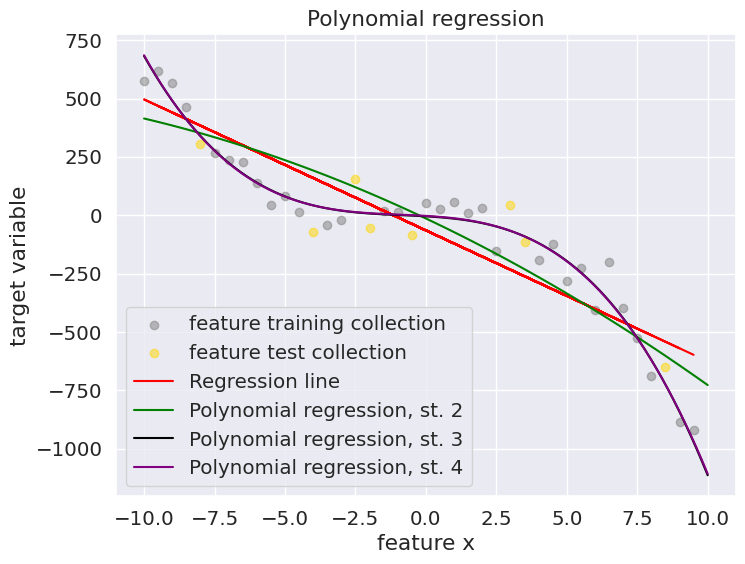

In [74]:
X_range_4 = np.linspace(-10, 10, 100).reshape(-1, 1)
X_range_poly_4 = poly.transform(X_range_4)
y_range_pred_4 = regressor_4.predict(X_range_poly_4)


plt.figure(figsize=(8,6))
plt.title('Polynomial regression')
plt.xlabel('feature x')
plt.ylabel('target variable')
plt.scatter(X_train, y_train, label='feature training collection', color='grey', alpha=0.5)
plt.scatter(X_test, y_test, label='feature test collection', color='gold', alpha=0.5)
plt.plot(X_train, intercept_1 + coef_1 * X_train, color='red', label="Regression line")
plt.plot(X_range_2, y_range_pred_2, color='green', label='Polynomial regression, st. 2')
plt.plot(X_range_3, y_range_pred_3, color='black', label='Polynomial regression, st. 3')
plt.plot(X_range_4, y_range_pred_4, color='purple', label='Polynomial regression, st. 4')
plt.legend()
plt.show()


####Model-based prediction

In [75]:
# Generate predictions for the test set using the trained linear regression model
y_pred_4 = regressor_4.predict(X_test_poly_4)

# Create a DataFrame to compare the true values (y_yest) with the predicted values (y_pred_1)
predictions_4 = pd.DataFrame(data= {'y_true': y_test, 'y_pred': y_pred_4})
predictions_4.head()

,y_true,y_pred
0,-83.381100,0.256990
1,-55.012182,8.788475
2,156.981179,13.504004
3,45.078813,-66.797687
4,307.083130,338.339996


In [76]:
# Calculate the prediction error as the difference between the true and predicted values
predictions_4['error'] = predictions_4['y_true'] - predictions_4['y_pred']
predictions_4.head()


,y_true,y_pred,error
0,-83.381100,0.256990,-83.638090
1,-55.012182,8.788475,-63.800657
2,156.981179,13.504004,143.477175
3,45.078813,-66.797687,111.876500
4,307.083130,338.339996,-31.256866


In [77]:
# Calculate the squared error by squaring the prediction errors
predictions_4['error_squared'] = predictions_4['error'] **2
predictions_4.head()

,y_true,y_pred,error,error_squared
0,-83.381100,0.256990,-83.638090,6995.330101
1,-55.012182,8.788475,-63.800657,4070.523830
2,156.981179,13.504004,143.477175,20585.699853
3,45.078813,-66.797687,111.876500,12516.351257
4,307.083130,338.339996,-31.256866,976.991680


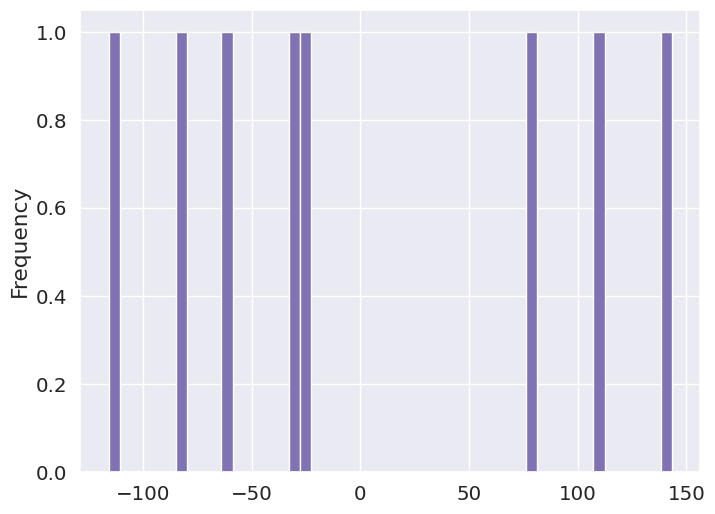

In [78]:
# Plot a histogram of the prediction errors to visualize their distribution
_ = predictions_4['error'].plot(kind='hist', bins=50, figsize=(8,6), color='m')

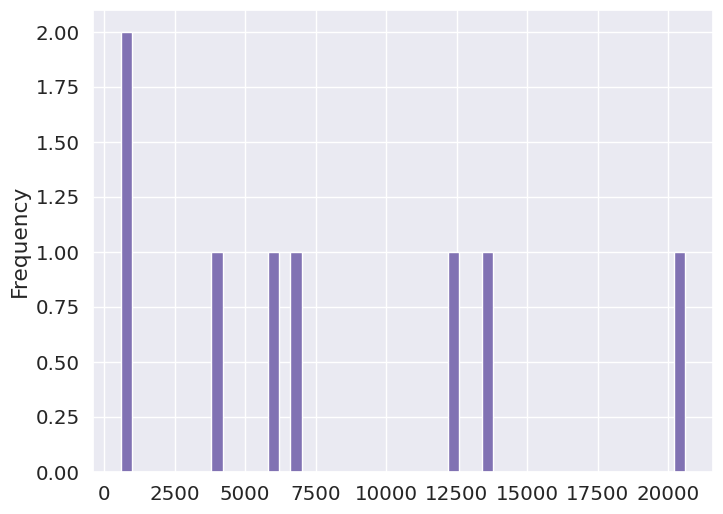

In [79]:
# Plot a histogram of the squared predictions errors to analyze their distribution
_ = predictions_4['error_squared'].plot(kind='hist', bins=50, figsize=(8,6), color='m')

####Linear model of the four degree metric

- Mean Absolute Error

In [80]:
# Calculate and return Mean Absolute Error (MAE) between the true and predicted values
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred_4)
print(f"The model makes an average error of {mean_absolute_error(y_test, y_pred_4):.3f}")

The model makes an average error of 81.427


- Mean Squared Error

In [81]:
# Calculate and return Mean Squared Error (MSE) between the true and predicted values
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred_4)
print(f'The mean squared error of the model is: {mean_squared_error(y_test, y_pred_4):.3f}')

The mean squared error of the model is: 8135.449


- Root Mean Squared Error - RMSE

In [83]:
# Calculate the Root Mean Squared Error (RMSE) by takig the square root of the Mean Swuared Error (MSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_4))
print(f'The Root Mean Squared Error (RMSE) of the model is: {rmse:.3f}')


The Root Mean Squared Error (RMSE) of the model is: 90.197


Max Error

In [84]:
# Calculate the maximum error between the actual and predicted values
from sklearn.metrics import max_error

max_err= max_error(y_test, y_pred_4)
print(f'The maximum error of the model is: {max_err:.3f}')

The maximum error of the model is: 143.477


- R2 score - coefficient of determination

In [85]:
# Calculate the R^2 (coefficient of determination) score for the model predictions
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_4)
print(f'The R^2 score of the model is: {r2:.3f}')

The R^2 score of the model is: 0.880


###Linear model of the five degree

In [86]:
# Import train_test_split function from sklearn
from sklearn.model_selection import train_test_split

# Split datasets into training and testing sets with 30% of the data allocated for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing collections
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (32, 1)
X_test shape: (8, 1)
y_train shape: (32,)
y_test shape: (8,)


In [87]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5)


X_train_poly_5 = poly.fit_transform(X_train)
X_test_poly_5 = poly.fit_transform(X_test)

In [88]:
X_train_poly_5[:10]

array([[     1.    ,      9.5   ,     90.25  ,    857.375 ,   8145.0625,
         77378.0938],
       [     1.    ,     -7.    ,     49.    ,   -343.    ,   2401.    ,
        -16807.    ],
       [     1.    ,      2.5   ,      6.25  ,     15.625 ,     39.0625,
            97.6562],
       [     1.    ,     -5.5   ,     30.25  ,   -166.375 ,    915.0625,
         -5032.8438],
       [     1.    ,     -3.5   ,     12.25  ,    -42.875 ,    150.0625,
          -525.2188],
       [     1.    ,      5.5   ,     30.25  ,    166.375 ,    915.0625,
          5032.8438],
       [     1.    ,      7.    ,     49.    ,    343.    ,   2401.    ,
         16807.    ],
       [     1.    ,     -6.    ,     36.    ,   -216.    ,   1296.    ,
         -7776.    ],
       [     1.    ,     -1.5   ,      2.25  ,     -3.375 ,      5.0625,
            -7.5938],
       [     1.    ,      2.    ,      4.    ,      8.    ,     16.    ,
            32.    ]])

In [89]:
X_test_poly_5[:10]

array([[     1.    ,     -0.5   ,      0.25  ,     -0.125 ,      0.0625,
            -0.0312],
       [     1.    ,     -2.    ,      4.    ,     -8.    ,     16.    ,
           -32.    ],
       [     1.    ,     -2.5   ,      6.25  ,    -15.625 ,     39.0625,
           -97.6562],
       [     1.    ,      3.    ,      9.    ,     27.    ,     81.    ,
           243.    ],
       [     1.    ,     -8.    ,     64.    ,   -512.    ,   4096.    ,
        -32768.    ],
       [     1.    ,     -4.    ,     16.    ,    -64.    ,    256.    ,
         -1024.    ],
       [     1.    ,      8.5   ,     72.25  ,    614.125 ,   5220.0625,
         44370.5312],
       [     1.    ,      3.5   ,     12.25  ,     42.875 ,    150.0625,
           525.2188]])

In [90]:
regressor_5 = LinearRegression()
regressor_5.fit(X_train_poly_5, y_train)

LinearRegression()

In [93]:
intercept_5 = regressor_5.intercept_

intercept_5

-3.1259661479299368

In [94]:
coef_5 = regressor_5.coef_

coef_5

array([ 0.    ,  4.8733, -2.4814, -1.3503,  0.0058,  0.0046])

####Linear model of the five degree - visualization

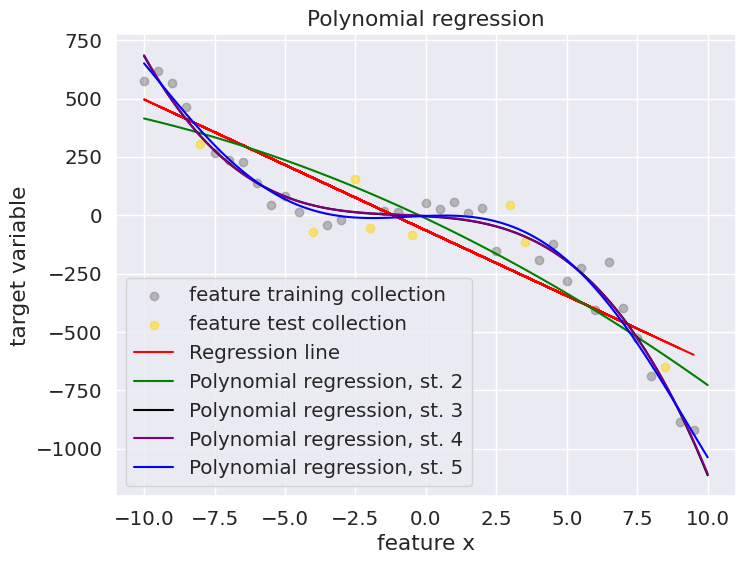

In [98]:
X_range_5 = np.linspace(-10, 10, 100).reshape(-1, 1)
X_range_poly_5 = poly.transform(X_range_5)
y_range_pred_5 = regressor_5.predict(X_range_poly_5)


plt.figure(figsize=(8,6))
plt.title('Polynomial regression')
plt.xlabel('feature x')
plt.ylabel('target variable')
plt.scatter(X_train, y_train, label='feature training collection', color='grey', alpha=0.5)
plt.scatter(X_test, y_test, label='feature test collection', color='gold', alpha=0.5)
plt.plot(X_train, intercept_1 + coef_1 * X_train, color='red', label="Regression line")
plt.plot(X_range_2, y_range_pred_2, color='green', label='Polynomial regression, st. 2')
plt.plot(X_range_3, y_range_pred_3, color='black', label='Polynomial regression, st. 3')
plt.plot(X_range_4, y_range_pred_4, color='purple', label='Polynomial regression, st. 4')
plt.plot(X_range_5, y_range_pred_5, color='blue', label='Polynomial regression, st. 5')
plt.legend()
plt.show()

####Model-based prediction

In [100]:
# Generate predictions for the test set using the trained linear regression model
y_pred_5 = regressor_5.predict(X_test_poly_5)

# Create a DataFrame to compare the true values (y_yest) with the predicted values (y_pred_1)
predictions_5 = pd.DataFrame(data= {'y_true': y_test, 'y_pred': y_pred_5})
predictions_5.head()


,y_true,y_pred
0,-83.381100,-6.013940
1,-55.012182,-12.049118
2,156.981179,-9.939390
3,45.078813,-45.715237
4,307.083130,364.257170


In [101]:
# Calculate the prediction error as the difference between the true and predicted values
predictions_5['error'] = predictions_5['y_true'] - predictions_5['y_pred']
predictions_5.head()

,y_true,y_pred,error
0,-83.381100,-6.013940,-77.367160
1,-55.012182,-12.049118,-42.963063
2,156.981179,-9.939390,166.920569
3,45.078813,-45.715237,90.794050
4,307.083130,364.257170,-57.174040


In [104]:
# Calculate the squared error by squaring the prediction errors
predictions_5['error_squared'] = predictions_5['error'] **2
predictions_5.head()


,y_true,y_pred,error,error_squared
0,-83.381100,-6.013940,-77.367160,5985.677399
1,-55.012182,-12.049118,-42.963063,1845.824802
2,156.981179,-9.939390,166.920569,27862.476341
3,45.078813,-45.715237,90.794050,8243.559439
4,307.083130,364.257170,-57.174040,3268.870804


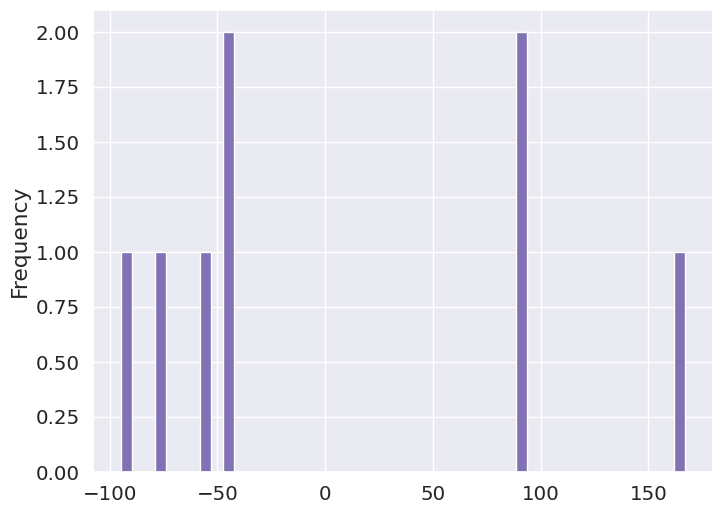

In [102]:
# Plot a histogram of the prediction errors to visualize their distribution
_ = predictions_5['error'].plot(kind='hist', bins=50, figsize=(8,6), color='m')

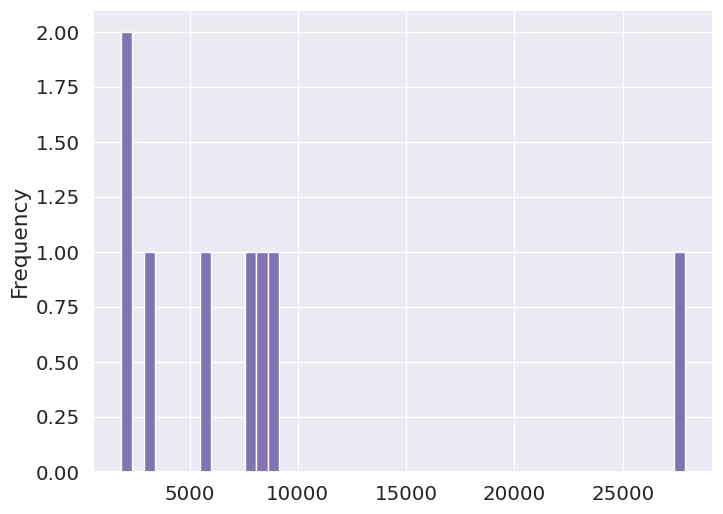

In [105]:
# Plot a histogram of the squared predictions errors to analyze their distribution
_ = predictions_5['error_squared'].plot(kind='hist', bins=50, figsize=(8,6), color='m')

####Linear model of the four five metric

- Mean Absolute Error

In [106]:
# Calculate and return Mean Absolute Error (MAE) between the true and predicted values
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred_5)
print(f"The model makes an average error of {mean_absolute_error(y_test, y_pred_5):.3f}")

The model makes an average error of 82.878


- Mean Squared Error

In [107]:
# Calculate and return Mean Squared Error (MSE) between the true and predicted values
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred_5)
print(f'The mean squared error of the model is: {mean_squared_error(y_test, y_pred_5):.3f}')

The mean squared error of the model is: 8252.196


- Root Mean Squared Error - RMSE

In [108]:
# Calculate the Root Mean Squared Error (RMSE) by takig the square root of the Mean Swuared Error (MSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_5))
print(f'The Root Mean Squared Error (RMSE) of the model is: {rmse:.3f}')

The Root Mean Squared Error (RMSE) of the model is: 90.842


- Max Error

In [109]:
# Calculate the maximum error between the actual and predicted values
from sklearn.metrics import max_error

max_err= max_error(y_test, y_pred_5)
print(f'The maximum error of the model is: {max_err:.3f}')

The maximum error of the model is: 166.921


- R2 score - coefficient of determination

In [110]:
# Calculate the R^2 (coefficient of determination) score for the model predictions
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_5)
print(f'The R^2 score of the model is: {r2:.3f}')

The R^2 score of the model is: 0.878


###comparison of metrics

In [136]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

results = pd.DataFrame(data={
    'name': ['regresja wielomianowa st. 1', 'regresja wielomianowa st. 2', 'regresja wielomianowa st. 3', 'regresja wielomianowa st. 4', 'regresja wielomianowa st. 5'],
    'r2_score': [r2_score(y_test, y_pred_1), r2_score(y_test, y_pred_2), r2_score(y_test, y_pred_3), r2_score(y_test, y_pred_4), r2_score(y_test, y_pred_5)],
    'mae': [mae(y_test, y_pred_1), mae(y_test, y_pred_2), mae(y_test, y_pred_3), mae(y_test, y_pred_4), mae(y_test, y_pred_5)],
    'mse': [mse(y_test, y_pred_1), mse(y_test, y_pred_2), mse(y_test, y_pred_3), mse(y_test, y_pred_4), mse(y_test, y_pred_5)],
    'rmse': [np.sqrt(mse(y_test, y_pred_1)), np.sqrt(mse(y_test, y_pred_2)), np.sqrt(mse(y_test, y_pred_3)), np.sqrt(mse(y_test, y_pred_4)), np.sqrt(mse(y_test, y_pred_5))],
    'max': [max_error(y_test, y_pred_1), max_error(y_test, y_pred_2), max_error(y_test, y_pred_3), max_error(y_test, y_pred_4), max_error(y_test, y_pred_5)]
    })
results.round(3)

,name,r2_score,mae,mse,rmse,max
0,regresja wielomianowa st. 1,0.650,133.876,23710.227,153.981,278.425
1,regresja wielomianowa st. 2,0.668,124.869,22543.882,150.146,265.434
2,regresja wielomianowa st. 3,0.880,81.435,8143.348,90.241,144.675
3,regresja wielomianowa st. 4,0.880,81.427,8135.449,90.197,143.477
4,regresja wielomianowa st. 5,0.878,82.878,8252.196,90.842,166.921


In [135]:
px.bar(results, x='name', y='r2_score', width=1100, height=500, title ='Polynomial regression - R2_score')

In [137]:
px.bar(results, x='name', y='mae', width=1100, height=500, title ='Polynomial regression - mean absolute error')

In [138]:
px.bar(results, x='name', y='mse', width=1100, height=500, title ='Polynomial regression - mean squared error')

In [139]:
px.bar(results, x='name', y='rmse', width=1100, height=500, title ='Polynomial regression - root mean squared error')

In [140]:
px.bar(results, x='name', y='max', width=1100, height=500, title ='Polynomial regression - max error')